# Analysis by Contents

In [1]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
okt = Okt()
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

### 1. 전체 데이터

In [3]:
every = pd.read_csv('./real_results/concat_everything_deaf.csv')

In [4]:
every = every.drop(['Unnamed: 0'], axis=1)
every = every.drop(['Unnamed: 0.1'], axis=1)
every

,question_num,modality,answer,answer_input,submit_time,elapse_time
0,1,"""감정""","[""슬픈"", ""우울한"", ""화난""]",NaN,2021-11-12 10:03:46,46232
1,2,"""감정""","{""strength"": 8, ""positive"": 2, ""activity"": 5}",NaN,2021-11-12 10:04:23,15695
2,3,"""감정""","[""기쁜"", ""감동적인""]",NaN,2021-11-12 10:04:38,12436
3,4,"""감정""","{""strength"": 9, ""positive"": 8, ""activity"": 8}",NaN,2021-11-12 10:04:45,6695
4,5,"""감정""","[""걱정되는"", ""무서운"", ""짜증나는"", ""불안한"", ""경계되는"", ""지루한""]",NaN,2021-11-12 10:05:00,13765
...,...,...,...,...,...,...
1237,116,"""댄스""","{""strength"": 7, ""positive"": 7, ""activity"": 5}",NaN,2021-11-12 16:23:23,12979
1238,117,"""댄스""","[""즐거운"", ""쾌활한"", ""평화로운"", ""강인한"", ""감동적인"", ""기대되는""]",NaN,2021-11-12 16:23:52,26760
1239,118,"""댄스""","{""strength"": 8, ""positive"": 8, ""activity"": 10}",NaN,2021-11-12 16:24:01,5821
1240,119,"""댄스""","[""기쁜"", ""아름다운"", ""믿음직한"", ""감동적인""]",NaN,2021-11-12 16:24:31,28079


In [5]:
# 데이터 먼저 전처리하기! (answer가 결측치인 행의 값 세트행은 삭제한다)
nan_every = every[every.isnull()['answer'] == True]

In [6]:
nan_lst = list(nan_every.index)

In [7]:
index_lst = []
for i in range(len(nan_lst)):
    if nan_lst[i] % 2 == 0:
        index_lst.append(nan_lst[i])
        index_lst.append(nan_lst[i]+1)
    else:
        index_lst.append(nan_lst[i])
        index_lst.append(nan_lst[i]-1)

index_lst = set(index_lst)
index_lst = list(index_lst)
print(index_lst)

[522, 523, 532, 533, 1062, 1063, 1074, 1075, 1080, 1081, 574, 575, 64, 65, 576, 577, 72, 73, 76, 77, 78, 79, 80, 81, 84, 85, 90, 91, 92, 93, 94, 95, 100, 101, 102, 103, 104, 105, 106, 107, 1146, 1147, 636, 637, 1156, 1157, 1166, 1167, 1170, 1171, 1174, 1175, 668, 669, 158, 159, 672, 673, 1186, 1187, 164, 165, 676, 677, 1194, 1195, 1196, 1197, 1198, 1199, 198, 199, 714, 715, 202, 203, 226, 227, 228, 229, 232, 233, 316, 317, 844, 332, 333, 845, 930, 931, 430, 431, 942, 943, 966, 967, 976, 977, 980, 981, 482, 483]


In [8]:
every = every.drop(index=index_lst, axis=0)
every.to_excel('every.xlsx')

### 2. 댄스 데이터

In [9]:
dance_df = every[every['modality'] == '"댄스"']
dance_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
83,81,"""댄스""","[""아무런 감정이 들지 않는다""]",NaN,2021-11-12 10:53:01,12124
86,84,"""댄스""","{""strength"": 7, ""positive"": 6, ""activity"": 6}",NaN,2021-11-12 10:53:17,4135
87,85,"""댄스""","[""쾌활한""]",NaN,2021-11-12 10:53:30,11933
88,86,"""댄스""","{""strength"": 6, ""positive"": 6, ""activity"": 6}",NaN,2021-11-12 10:53:35,3512
89,87,"""댄스""","[""강인한""]",NaN,2021-11-12 10:53:47,11358
...,...,...,...,...,...,...
1237,116,"""댄스""","{""strength"": 7, ""positive"": 7, ""activity"": 5}",NaN,2021-11-12 16:23:23,12979
1238,117,"""댄스""","[""즐거운"", ""쾌활한"", ""평화로운"", ""강인한"", ""감동적인"", ""기대되는""]",NaN,2021-11-12 16:23:52,26760
1239,118,"""댄스""","{""strength"": 8, ""positive"": 8, ""activity"": 10}",NaN,2021-11-12 16:24:01,5821
1240,119,"""댄스""","[""기쁜"", ""아름다운"", ""믿음직한"", ""감동적인""]",NaN,2021-11-12 16:24:31,28079


### 3. 시각적 데이터 4종

In [10]:
visual_df = every[every['modality'].isin(['"감정"', '"영화"', '"뮤직비디오"', '"시각화"'])]
face_df = every[every['modality']=='"감정"']
movie_df = every[every['modality']=='"영화"']
abs_vis_df = every[every['modality']=='"시각화"']
mv_df = every[every['modality']=='"뮤직비디오"']

In [11]:
face_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
0,1,"""감정""","[""슬픈"", ""우울한"", ""화난""]",NaN,2021-11-12 10:03:46,46232
1,2,"""감정""","{""strength"": 8, ""positive"": 2, ""activity"": 5}",NaN,2021-11-12 10:04:23,15695
2,3,"""감정""","[""기쁜"", ""감동적인""]",NaN,2021-11-12 10:04:38,12436
3,4,"""감정""","{""strength"": 9, ""positive"": 8, ""activity"": 8}",NaN,2021-11-12 10:04:45,6695
4,5,"""감정""","[""걱정되는"", ""무서운"", ""짜증나는"", ""불안한"", ""경계되는"", ""지루한""]",NaN,2021-11-12 10:05:00,13765
...,...,...,...,...,...,...
1137,16,"""감정""","{""strength"": 8, ""positive"": 7, ""activity"": 7}",NaN,2021-11-12 14:00:02,9640
1138,17,"""감정""","[""기대되는"", ""욕망의""]",NaN,2021-11-12 14:00:26,21059
1139,18,"""감정""","{""strength"": 10, ""positive"": 10, ""activity"": 10}",NaN,2021-11-12 14:00:37,7950
1140,19,"""감정""","[""걱정되는"", ""무서운""]",NaN,2021-11-12 14:00:56,16109


In [12]:
movie_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
22,21,"""영화""","[""욕망의"", ""기대되는""]",NaN,2021-11-12 10:11:07,21544
23,21,"""영화""","[""욕망의"", ""기대되는"", ""걱정되는""]",NaN,2021-11-12 10:11:12,4973
24,22,"""영화""","{""strength"": 8, ""positive"": 5, ""activity"": 5}",NaN,2021-11-12 10:11:21,7340
25,23,"""영화""","[""반항적인"", ""짜증나는"", ""싫은""]",NaN,2021-11-12 10:11:52,29374
26,24,"""영화""","{""strength"": 10, ""positive"": 1, ""activity"": 5}",NaN,2021-11-12 10:11:58,5199
...,...,...,...,...,...,...
1155,34,"""영화""","{""strength"": 10, ""positive"": 10, ""activity"": 10}",NaN,2021-11-12 14:09:26,7453
1158,37,"""영화""","[""평화로운"", ""기쁜""]",NaN,2021-11-12 14:11:04,29276
1159,38,"""영화""","{""strength"": 6, ""positive"": 6, ""activity"": 6}",NaN,2021-11-12 14:11:17,10346
1160,39,"""영화""","[""욕망의"", ""쾌활한""]",NaN,2021-11-12 14:12:07,47406


In [13]:
abs_vis_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
63,61,"""시각화""","[""아무런 감정이 들지 않는다""]",NaN,2021-11-12 10:50:13,1293659
66,64,"""시각화""","{""strength"": 8, ""positive"": 7, ""activity"": 7}",NaN,2021-11-12 10:50:35,4657
67,65,"""시각화""","[""강인한""]",NaN,2021-11-12 10:50:44,7653
68,66,"""시각화""","{""strength"": 7, ""positive"": 7, ""activity"": 6}",NaN,2021-11-12 10:50:49,4007
69,67,"""시각화""","[""아름다운"", ""강인한"", ""차분한""]",NaN,2021-11-12 10:51:06,15392
...,...,...,...,...,...,...
1191,70,"""시각화""","{""strength"": 4, ""positive"": 3, ""activity"": 2}",NaN,2021-11-12 16:05:31,13277
1192,71,"""시각화""","[""쾌활한""]",NaN,2021-11-12 16:05:53,19307
1193,72,"""시각화""","{""strength"": 7, ""positive"": 7, ""activity"": 7}",NaN,2021-11-12 16:06:02,5989
1200,79,"""시각화""","[""지루한""]",NaN,2021-11-12 16:08:21,20867


In [14]:
mv_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
43,41,"""뮤직비디오""","[""차분한"", ""슬픈"", ""우울한""]",NaN,2021-11-12 10:17:51,24904
44,42,"""뮤직비디오""","{""strength"": 8, ""positive"": 4, ""activity"": 2}",NaN,2021-11-12 10:17:57,4373
45,43,"""뮤직비디오""","[""차분한"", ""슬픈"", ""우울한""]",NaN,2021-11-12 10:18:14,15996
46,44,"""뮤직비디오""","{""strength"": 8, ""positive"": 3, ""activity"": 1}",NaN,2021-11-12 10:18:21,5901
47,45,"""뮤직비디오""","[""차분한"", ""아름다운"", ""평화로운"", ""슬픈"", ""우울한""]",NaN,2021-11-12 10:18:43,21664
...,...,...,...,...,...,...
1177,56,"""뮤직비디오""","{""strength"": 8, ""positive"": 7, ""activity"": 4}",NaN,2021-11-12 14:20:05,8698
1178,57,"""뮤직비디오""","[""혐오스러운"", ""짜증나는""]",NaN,2021-11-12 14:20:39,30664
1179,58,"""뮤직비디오""","{""strength"": 9, ""positive"": 3, ""activity"": 7}",NaN,2021-11-12 14:21:04,18732
1180,59,"""뮤직비디오""","[""강인한""]",NaN,2021-11-12 14:21:29,21350


## 농인 감정 단어 차원 만들기

In [15]:
from ast import literal_eval

# 단어만 뽑아내는 함수
def extract_word(df):
    lst = df['answer'].tolist()
    word_lst = []
    
    for i in range(len(lst)):
        try:
            if '[' in lst[i]:
                word_lst.append(lst[i])
        except:
            pass
        
    return word_lst

In [16]:
# 차원 점수만 뽑아내는 함수
def annotated_score(df):
    lst = df['answer'].tolist()
    annotated_lst = []
    
    for i in range(len(lst)):
        try:
            if '{' in lst[i]:
                annotated_lst.append(lst[i])
        except:
            pass
        
    return annotated_lst

In [17]:
word_lst = extract_word(every)

In [18]:
score_lst = annotated_score(every)

In [19]:
def merge_word_and_score(word_lst, score_lst):
    real_lst = []
    for i in range(len(word_lst)):
        for j in range(len(score_lst)):
            try:
                if i == j:
                    real_lst.append(word_lst[i] + ', ' +score_lst[j])
                else:
                    pass
            except:
                pass
    return real_lst

In [20]:
annotated_data = merge_word_and_score(word_lst, score_lst)

In [21]:
emotion_words = {"즐거운": 0, "기쁜": 0, "쾌활한": 0, "욕망의": 0, "아름다운": 0, "차분한": 0, "평화로운": 0, "강인한": 0, "감동적인": 0,
               "믿음직한": 0, "기대되는": 0, "불안한": 0, "걱정되는": 0, "무서운": 0, "싫은": 0, "짜증나는": 0, "화난": 0, "경계되는": 0,
               "반항적인": 0, "지루한": 0, "슬픈": 0, "우울한": 0, "혐오스러운": 0, "놀란": 0, "아무런 감정이 들지 않는다": 0}

In [22]:
def count_emotion_words(emotion_words_dict, annotated_data):
    for key, value in emotion_words_dict.items():
        for j in range(len(annotated_data)):
            annotated_dict = literal_eval(annotated_data[j])
            if key in annotated_dict[0]:
                emotion_words_dict[key] += 1
    return emotion_words

In [23]:
count = count_emotion_words(emotion_words, annotated_data)
count

{'즐거운': 102,
 '기쁜': 50,
 '쾌활한': 124,
 '욕망의': 61,
 '아름다운': 69,
 '차분한': 79,
 '평화로운': 57,
 '강인한': 104,
 '감동적인': 37,
 '믿음직한': 45,
 '기대되는': 88,
 '불안한': 58,
 '걱정되는': 35,
 '무서운': 39,
 '싫은': 29,
 '짜증나는': 38,
 '화난': 47,
 '경계되는': 70,
 '반항적인': 63,
 '지루한': 39,
 '슬픈': 56,
 '우울한': 56,
 '혐오스러운': 34,
 '놀란': 29,
 '아무런 감정이 들지 않는다': 13}

In [24]:
df = pd.DataFrame(list(count.items()), columns=['단어', '개수'])
df.to_excel('pre.xlsx')

In [25]:
emotion_dict = {"즐거운": [0, 0, 0], "기쁜": [0, 0, 0], "쾌활한": [0, 0, 0], "욕망의": [0, 0, 0], "아름다운": [0, 0, 0], "차분한": [0, 0, 0], "평화로운": [0, 0, 0], "강인한": [0, 0, 0], "감동적인": [0, 0, 0],
               "믿음직한": [0, 0, 0], "기대되는": [0, 0, 0], "불안한": [0, 0, 0], "걱정되는": [0, 0, 0], "무서운": [0, 0, 0], "싫은": [0, 0, 0], "짜증나는": [0, 0, 0], "화난": [0, 0, 0], "경계되는": [0, 0, 0],
               "반항적인": [0, 0, 0], "지루한": [0, 0, 0], "슬픈": [0, 0, 0], "우울한": [0, 0, 0], "혐오스러운": [0, 0, 0], "놀란": [0, 0, 0], "아무런 감정이 들지 않는다": [0, 0, 0]}

In [26]:
# 각 차원의 emotion 딕셔너리에 값을 더해주는 함수
def make_dimension_dict(emotion_dict, annotated_data):
    for key, value in emotion_dict.items():
        for j in range(len(annotated_data)):
            annotated_dict = literal_eval(annotated_data[j])
#             print(annotated_dict[1])
            try:
                if key in annotated_dict[0]:
                    emotion_dict[key][0] += annotated_dict[1]['strength']
                    emotion_dict[key][1] += annotated_dict[1]['positive']
                    emotion_dict[key][2] += annotated_dict[1]['activity']
            except:
                pass
            
    return emotion_dict

In [27]:
dimension_dict = make_dimension_dict(emotion_dict, annotated_data)
dimension_dict

{'즐거운': [680, 592, 606],
 '기쁜': [365, 265, 295],
 '쾌활한': [807, 720, 778],
 '욕망의': [440, 352, 363],
 '아름다운': [466, 390, 382],
 '차분한': [540, 422, 390],
 '평화로운': [392, 333, 305],
 '강인한': [717, 593, 644],
 '감동적인': [257, 201, 199],
 '믿음직한': [310, 226, 253],
 '기대되는': [613, 492, 499],
 '불안한': [411, 296, 347],
 '걱정되는': [269, 204, 216],
 '무서운': [274, 160, 211],
 '싫은': [199, 146, 158],
 '짜증나는': [266, 179, 199],
 '화난': [336, 210, 258],
 '경계되는': [485, 357, 399],
 '반항적인': [426, 290, 359],
 '지루한': [264, 200, 178],
 '슬픈': [387, 227, 276],
 '우울한': [396, 251, 298],
 '혐오스러운': [226, 159, 190],
 '놀란': [205, 140, 171],
 '아무런 감정이 들지 않는다': [81, 76, 75]}

In [28]:
df = pd.DataFrame(list(count.items()), columns=['단어', '빈도'])
df.to_excel('df.xlsx')

In [29]:
# # 평균 점수를 구하는 함수
# def average_score(dimension_dict, count):
#     for key, value in dimension_dict.items():
#         for k, v in count.items():
#             try:
#                 if key == k:
#                     value[0] = round(value[0] / v, 2)
#                     value[1] = round(value[1] / v, 2)
#                     value[2] = round(value[2] / v, 2)
#             except:
#                 pass

#     return dimension_dict

In [30]:
# average = average_score(dimension_dict, count)

In [31]:
# df = pd.DataFrame(list(average.values()), columns=['Valence', 'Arousal', 'Intensity'])
# df

In [32]:
# df.to_excel('average.xlsx')

In [33]:
# -1 와 1 사이로 어노테이션된 값을 리스케일링해주는 함수
def normalizer(dimension_dict, emotion_dict):
    lst_a = []
    lst_b = []
    lst_c = []
    
    dimension_numbers = list(dimension_dict.values())
    
    for i in range(len(dimension_numbers)):
        for j in range(len(dimension_numbers[i])):
            lst_a.append(dimension_numbers[i][0])
            lst_b.append(dimension_numbers[i][1])
            lst_c.append(dimension_numbers[i][2])
            
            
    # A열의 최댓값과 최솟값 구하기       
    max_num_a = max(lst_a)
    min_num_a = min(lst_a)
    
    # B열의 최댓값과 최솟값 구하기       
    max_num_b = max(lst_b)
    min_num_b = min(lst_b)
    
    # C열의 최댓값과 최솟값 구하기       
    max_num_c = max(lst_c)
    min_num_c = min(lst_c)
    
    
    # A열, B열, C열의 rescaling 된 값 구하기
    for key, values in dimension_dict.items():
        dimension_dict[key][0] = ((dimension_dict[key][0] - min_num_a) / (max_num_a - min_num_a)) * 2 -1
        dimension_dict[key][1] = ((dimension_dict[key][1] - min_num_b) / (max_num_b - min_num_b)) * 2 -1
        dimension_dict[key][2] = ((dimension_dict[key][2] - min_num_c) / (max_num_c - min_num_c)) * 2 -1
        
        
    return dimension_dict

In [34]:
emotion = normalizer(dimension_dict, emotion_dict)
emotion

{'즐거운': [0.6501377410468319, 0.6024844720496894, 0.5106685633001422],
 '기쁜': [-0.21763085399449034, -0.4130434782608695, -0.3741109530583214],
 '쾌활한': [1.0, 1.0, 1.0],
 '욕망의': [-0.011019283746556474, -0.1428571428571429, -0.18065433854907542],
 '아름다운': [0.06060606060606055, -0.024844720496894457, -0.12660028449502136],
 '차분한': [0.2644628099173554, 0.07453416149068315, -0.10384068278805125],
 '평화로운': [-0.14325068870523416, -0.20186335403726707, -0.34566145092460887],
 '강인한': [0.7520661157024793, 0.6055900621118013, 0.6187766714082503],
 '감동적인': [-0.5151515151515151, -0.6118012422360248, -0.647226173541963],
 '믿음직한': [-0.36914600550964183, -0.5341614906832298, -0.49359886201991465],
 '기대되는': [0.46556473829201095, 0.2919254658385093, 0.2062588904694167],
 '불안한': [-0.09090909090909094, -0.31677018633540377, -0.22617354196301565],
 '걱정되는': [-0.4820936639118457, -0.6024844720496895, -0.5988620199146515],
 '무서운': [-0.4683195592286501, -0.7391304347826086, -0.6130867709815078],
 '싫은': [-0.6749

In [35]:
from mpl_toolkits.mplot3d import Axes3D

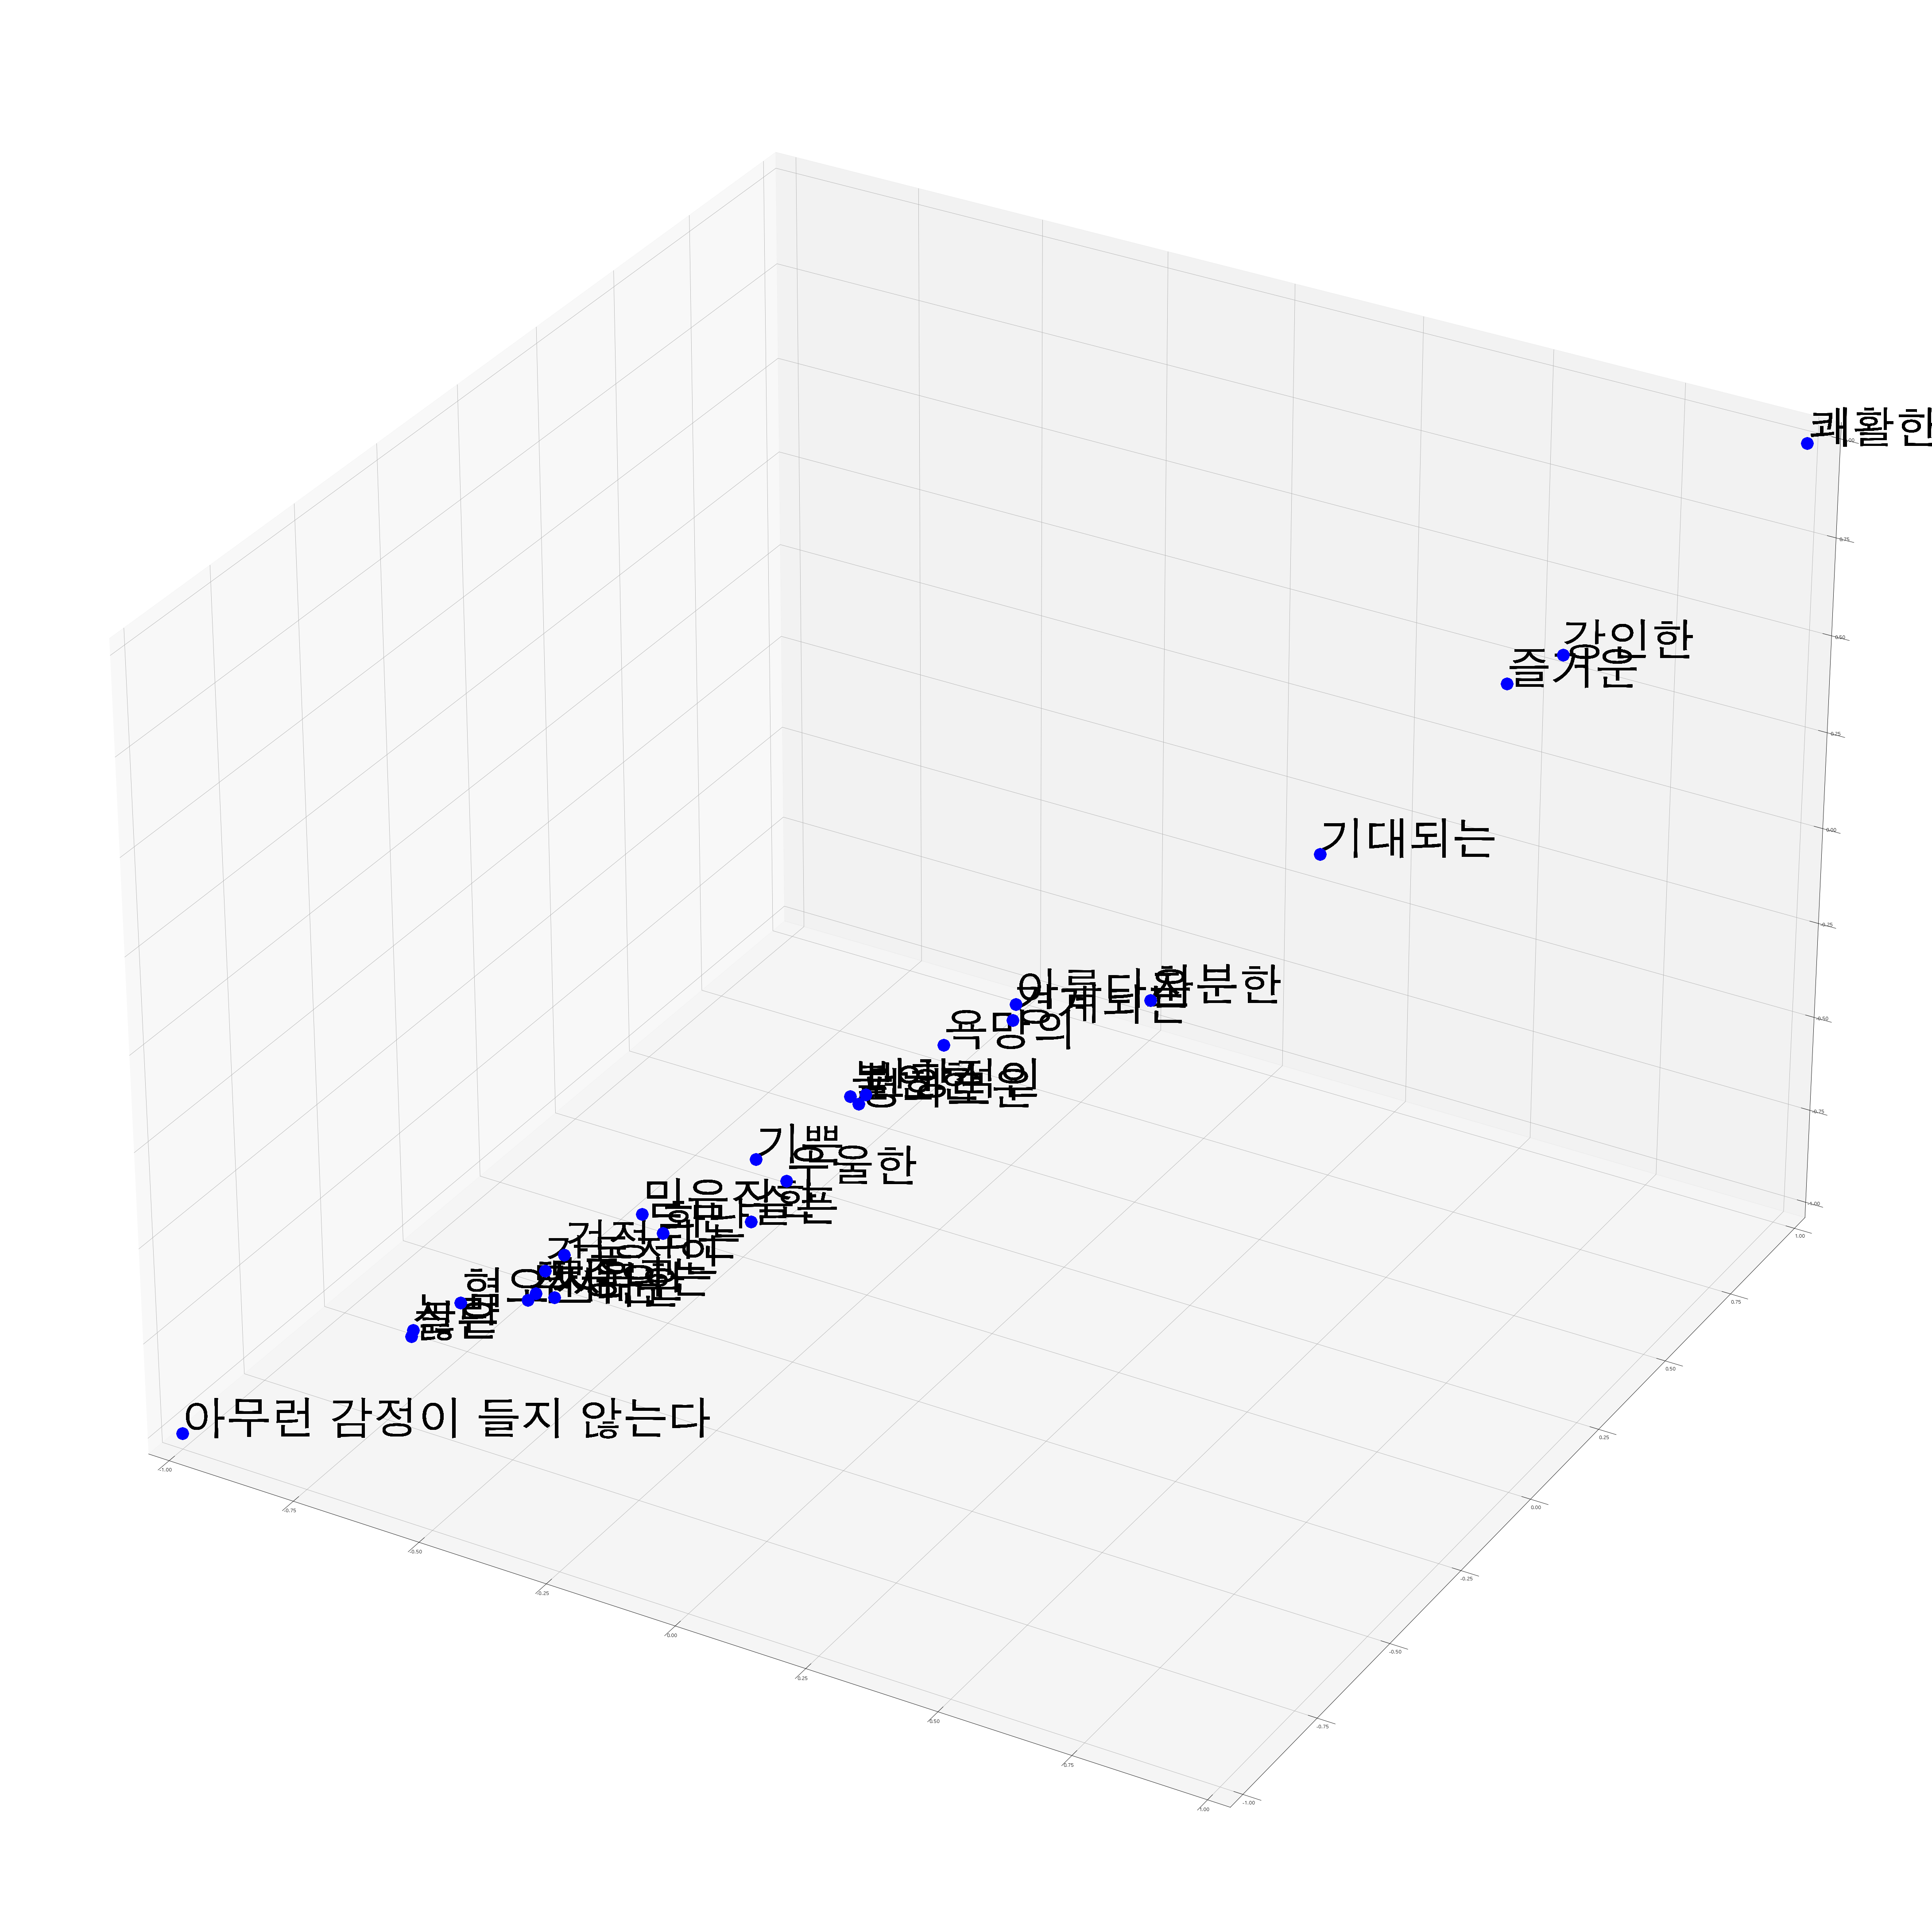

In [36]:
labels = list(emotion.keys())
fig = plt.figure(figsize=(80, 80))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

for idx, name in enumerate(labels):
    for key, values in emotion.items():
        ax.scatter(emotion[name][0], emotion[name][1], emotion[name][2], color='blue', s=700)
        ax.text(emotion[name][0], emotion[name][1], emotion[name][2], name, size=100)

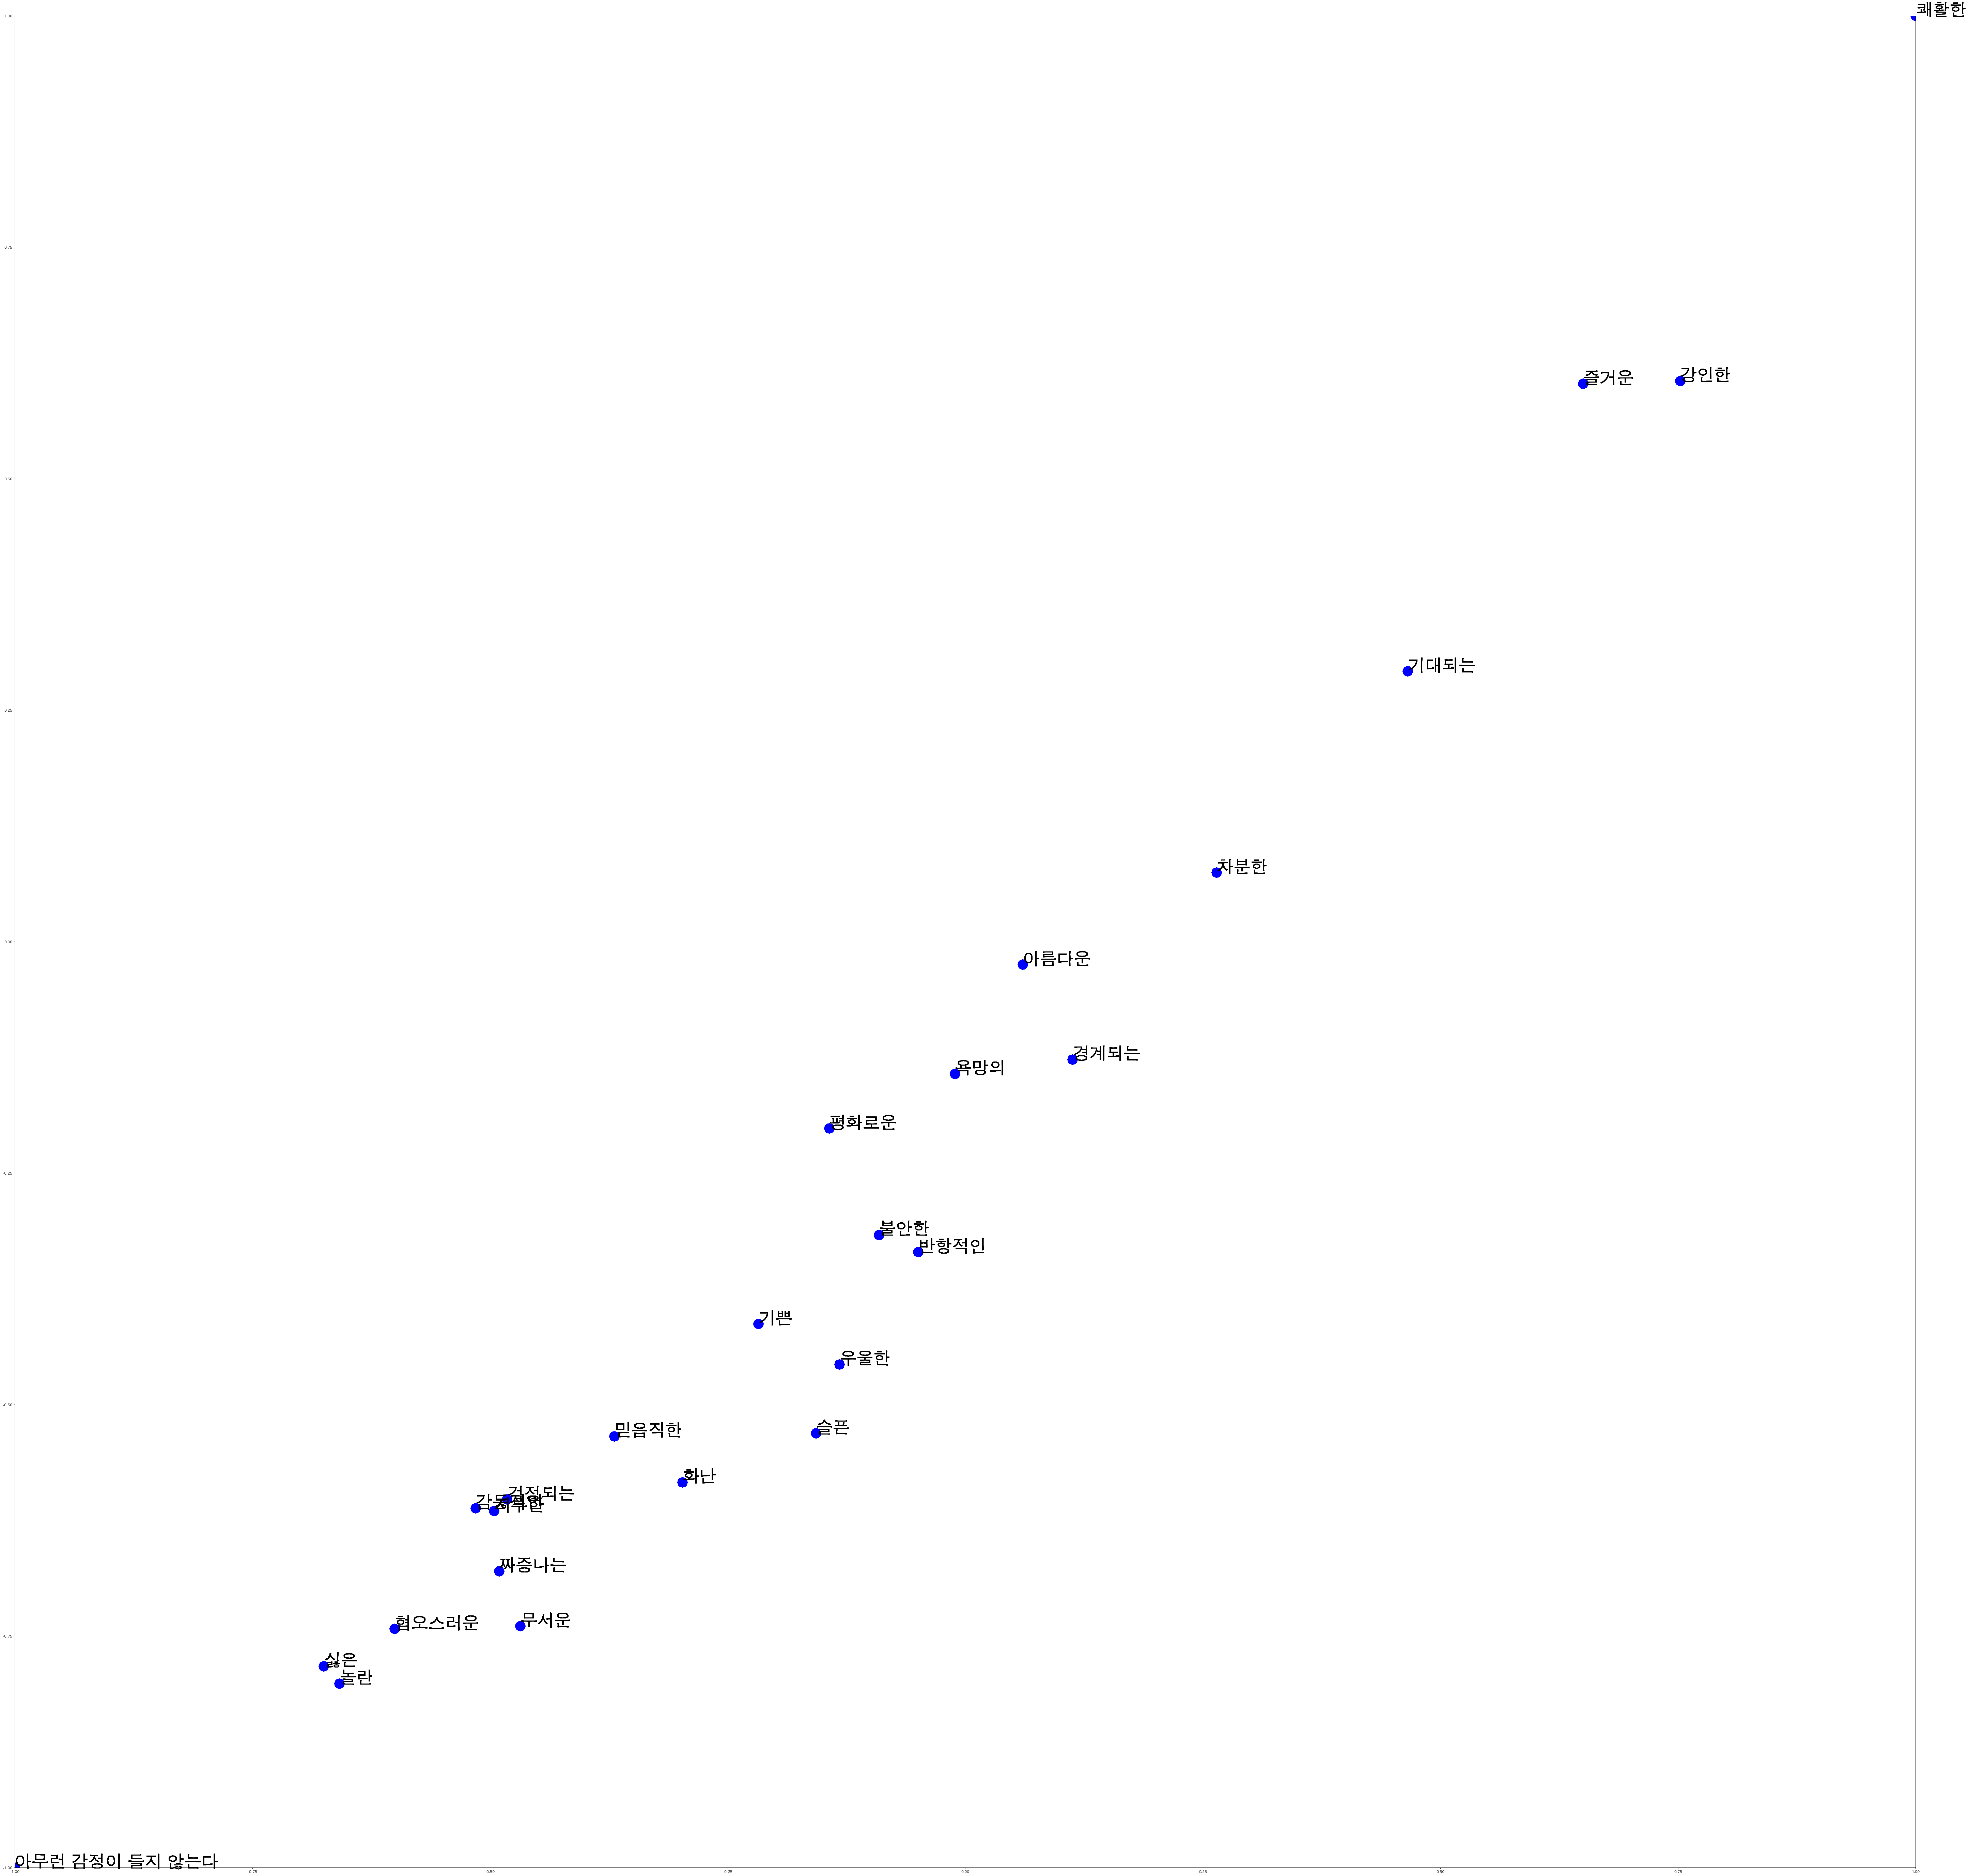

In [39]:
# 2D
labels = list(emotion.keys())
plt.figure(figsize=(100, 100))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
for idx, name in enumerate(labels):
    for key, values in emotion.items():
        plt.scatter(emotion[name][0], emotion[name][1], color='blue', s=800)
        plt.text(emotion[name][0], emotion[name][1], name, size=50)